In [1]:
import json
import pandas as pd
import seaborn as sns
path=''
result_path='./'

pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 999)

In [2]:
f = 'intent_report.json'

with open(path+ result_path+ f) as json_file:
    results  = json.load(json_file)
    

In [3]:
results

{'pt_cc_newspaper': {'precision': 1.0,
  'recall': 0.8333333333333334,
  'f1-score': 0.9090909090909091,
  'support': 6,
  'confused_with': {'pt_bot_personality': 1}},
 'pt_bot_capabilities': {'precision': 0.6363636363636364,
  'recall': 0.875,
  'f1-score': 0.7368421052631579,
  'support': 8,
  'confused_with': {'pt_cc_joke': 1}},
 'pt_covid_worry': {'precision': 0.8333333333333334,
  'recall': 0.7142857142857143,
  'f1-score': 0.7692307692307692,
  'support': 7,
  'confused_with': {'pt_covid_info': 1, 'pt_prevention_general': 1}},
 'pt_cc_weather': {'precision': 0.9090909090909091,
  'recall': 0.9090909090909091,
  'f1-score': 0.9090909090909091,
  'support': 11,
  'confused_with': {'pt_cc_philosophical': 1}},
 'pt_state_emergency_info': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 1,
  'confused_with': {}},
 'pt_quarantine_toiletpaper': {'precision': 0.0,
  'recall': 0.0,
  'f1-score': 0.0,
  'support': 1,
  'confused_with': {'pt_cc_philosophical': 1}},
 'pt_c

In [4]:
metric_lst=[]
confused_lst=[]
accuracy = results['accuracy']
averages_lst = []

for k in ['macro avg', 'weighted avg']:
    v=results[k]
    averages_lst.append(['macro avg', v['precision'], v['recall'], v['f1-score'], v['support']])


for k, v in results.items():
    if k not in ['accuracy','macro avg', 'weighted avg']:
        metric_lst.append([k, v['precision'], v['recall'], v['f1-score'], v['support']])
        for i, c in v['confused_with'].items():
            confused_lst.append([k, i, c])


In [5]:
print('accuracy', accuracy)

accuracy 0.8262948207171315


In [6]:
averages = pd.DataFrame(averages_lst, columns = ['intent', 'precision', 'recall', 'f1-score', 'support'])
metrics = pd.DataFrame(metric_lst, columns = ['intent', 'precision', 'recall', 'f1-score', 'support'])
confusion = pd.DataFrame(confused_lst, columns = ['intent', 'confused_with', 'cnt'])

In [7]:
averages

,intent,precision,recall,f1-score,support
0,macro avg,0.774515,0.757424,0.754701,1255
1,macro avg,0.830506,0.826295,0.820968,1255


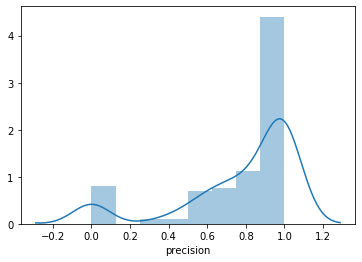

In [8]:
sns.distplot(metrics.precision)

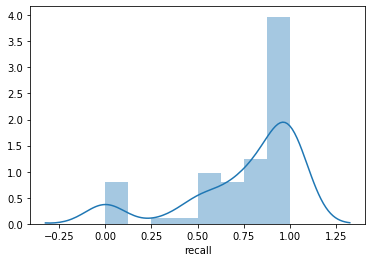

In [9]:
sns.distplot(metrics.recall)

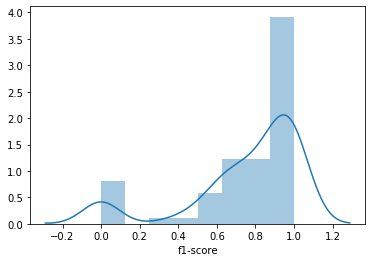

In [10]:
sns.distplot(metrics['f1-score'])

In [11]:
metrics [metrics.recall<0.5].sort_values('support',ascending=False)

,intent,precision,recall,f1-score,support
32,pt_greeting_goodbye,0.333333,0.384615,0.357143,13
125,pt_vocative_no,0.500000,0.285714,0.363636,7
118,pt_bot_sexual,1.000000,0.400000,0.571429,5
56,pt_covid_aftereffects_immunity,0.000000,0.000000,0.000000,3
25,pt_vocative_you_welcome,0.000000,0.000000,0.000000,3
43,pt_quarantine_children,1.000000,0.333333,0.500000,3
44,pt_sources,0.000000,0.000000,0.000000,3
19,pt_covid_crisis_howlong,0.000000,0.000000,0.000000,2
36,pt_prevention_entering_home,0.000000,0.000000,0.000000,2
103,pt_covid_mortality_rate,0.000000,0.000000,0.000000,2


In [12]:
confusion.sort_values('cnt', ascending=False)

,intent,confused_with,cnt
106,pt_bot_personal_questions,pt_cc_philosophical,4
100,pt_cc_religion,pt_cc_philosophical,3
22,pt_cc_philosophical,pt_cc_religion,3
42,pt_prevention_respiratory_hygiene,pt_vocative_thank_you,3
58,pt_greeting_hello,pt_greeting_how_are_you,2
62,pt_country,pt_covid_situation,2
110,pt_bot_appearance,pt_bot_real,2
90,pt_vocative_call,pt_comment_offense,2
87,pt_bot_fear,pt_bot_personal_questions,2
27,pt_cc_politics,pt_cc_philosophical,2


In [13]:
confusion.groupby('intent').cnt.sum().reset_index().sort_values('cnt', ascending=False)

,intent,cnt
12,pt_bot_personal_questions,5
47,pt_greeting_goodbye,4
31,pt_country,4
23,pt_cc_religion,4
26,pt_comment_offense,4
21,pt_cc_philosophical,4
60,pt_prevention_respiratory_hygiene,3
58,pt_prevention_medical_attention,3
48,pt_greeting_hello,3
18,pt_cc_joke,3
